# UV map
- nii to vtk
    - nii2mesh
- vtk to obj
    - https://imagetostl.com/convert/file/vtk/to/obj
- UV map is computed from UV-mapper
    - https://www.uvmapper.com/downloads.html

# TODO
- 특정한 width 정해서 plotting 하기
    - Vertex를 기준으로 해야함
- uv map과 surface map의 축적알기 (width의 크기)


# Common Libraries

In [1]:

import os
import matplotlib.pylab as plt
import numpy as np
import plotly.graph_objects as go
import nibabel as nb

# Custom Libraries

In [2]:
import sys
sys.path.append("/home/seojin/Seojin_commonTool/Module")

from plot_3d import draw_uv_map
from brain_coord import RASp_toLPSp, reference2imageCoord
from brain_mesh import show_stat_onUV, load_mesh
from sj_image_process import find_connected_components_faces
from sj_array import map_indicies

# Constants

In [3]:
mask_dir_path = "/mnt/ext1/seojin/HR/exp_blueprint_0324v4/fMRI_data/output/roi/mask"
lt_hippo_path = os.path.join(mask_dir_path, "lt_hippocampus.obj")
lt_hippo_uv_path = os.path.join(mask_dir_path, "lt_hippocampus_afterUVmap_planarZ.obj")

# Load Data

In [4]:
lt_hippo_mesh_info = load_mesh(lt_hippo_path)
lt_hippo_uv_mesh_info = load_mesh(lt_hippo_uv_path, type_ = "uv")

# Orientation

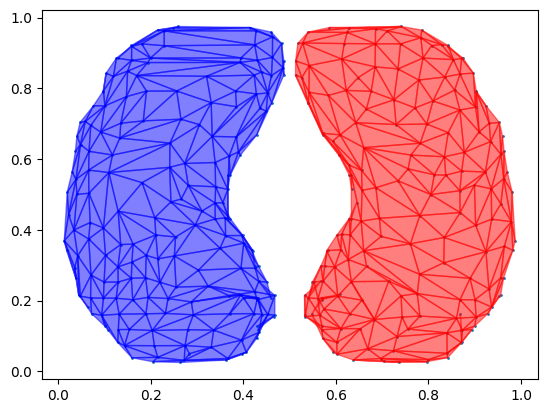

In [5]:
first_components = find_connected_components_faces(faces = lt_hippo_uv_mesh_info["face"])[0]
second_components = find_connected_components_faces(faces = lt_hippo_uv_mesh_info["face"])[1]
highlight_face_info = {
    "first" : {
        "data" : first_components,
        "color" : "red",
    },
    "second" : {
        "data" : second_components,
        "color" : "blue",
    },
}
draw_uv_map(lt_hippo_uv_mesh_info["uv"], lt_hippo_uv_mesh_info["face"], highlight_face_info = highlight_face_info)

In [6]:
superior_vertices = np.unique(lt_hippo_uv_mesh_info["face"][second_components].reshape(-1))

# Functions

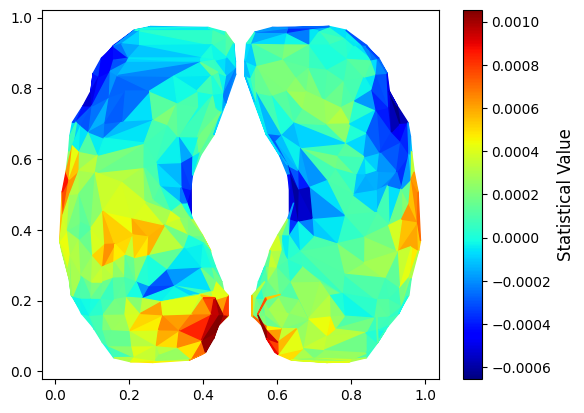

In [7]:
show_stat_onUV(vertices = lt_hippo_uv_mesh_info["vertex"], 
               uv_coordinates = lt_hippo_uv_mesh_info["uv"],
               faces = lt_hippo_uv_mesh_info["face"],
               stat_path = "/mnt/ext1/seojin/HR/exp_blueprint_0324v4/fMRI_data/output/Group/rsa/rdm/set/WholeSet/base_seqOnly/None/pattern_separation/mean.nii.gz")

# Remain superior only

In [11]:
# Vertex index mapping
mapping = map_indicies(original_indices = np.arange(len(lt_hippo_uv_mesh_info["vertex"])), including_indices = superior_vertices)

# Change face based on vertex mapping
vectorized_function = np.vectorize(mapping.get)
coverted_faces = vectorized_function(lt_hippo_uv_mesh_info["face"])

# Converted verticies
is_converted_vertices = np.array(list(mapping.values())) != -1
converted_uv_vertices = lt_hippo_uv_mesh_info["uv"][is_converted_vertices]
converted_vertices = lt_hippo_uv_mesh_info["vertex"][is_converted_vertices]

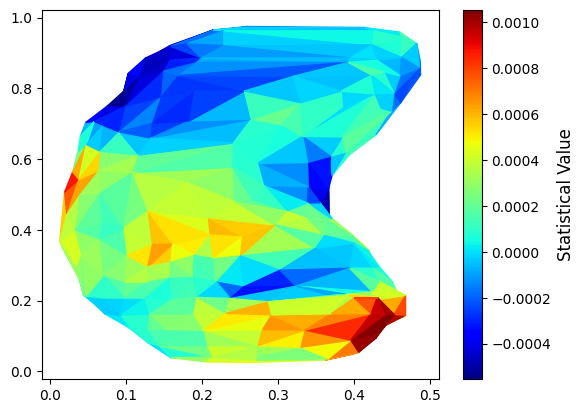

In [12]:
show_stat_onUV(vertices = converted_vertices, 
               uv_coordinates = converted_uv_vertices,
               faces = coverted_faces,
               stat_path = "/mnt/ext1/seojin/HR/exp_blueprint_0324v4/fMRI_data/output/Group/rsa/rdm/set/WholeSet/base_seqOnly/None/pattern_separation/mean.nii.gz")

In [ ]:
from_point, 
to_point, 
width,